<a href="https://colab.research.google.com/github/JefersonBiasim/CV/blob/main/Atividade_2_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 02**
---


**Disciplina:** Sistemas Inteligentes<br>
**Nome:** Jeferson de Oliveira Biasim<br>
**Turma:** 8º Semestre - Sistemas de Informação

# **1 - Importação das bibliotecas**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import tensorflow as tf
from yellowbrick.classifier import  ROCAUC

In [ ]:
#Os dois bancos são da Atividade 1 que foram criados documentos de formato CSV
url1 = '/content/drive/MyDrive/banco_x.csv'
X = pd.read_csv(url1)

In [ ]:
url2 = '/content/drive/MyDrive/banco_y.csv'
y = pd.read_csv(url2)

In [ ]:
X.shape

(9502, 8)

In [ ]:
X.head()

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante
0,2,3.0,0,0,0,95.12,18.0,2
1,2,58.0,1,0,1,87.96,39.2,2
2,1,8.0,0,0,0,110.89,17.6,2
3,1,70.0,0,0,1,69.04,35.9,1
4,2,14.0,0,0,0,161.28,19.1,2


In [ ]:
y.shape

(9502, 1)

In [ ]:
y.head()

,avc
0,0
1,0
2,0
3,0
4,0


In [ ]:
# A biblioteca Scikit Learn fornece uma seleção de recursos eficientes para modelagem estatística, análise e mineração de dados, além de suporte ao aprendizado supervisionado e não supervisionado
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25)

In [ ]:
#Criando a rede neural
classificador = Sequential()
classificador.add(Dense(units=16, activation='relu', input_dim=8))
classificador.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#binary_crossentropy é a função de perda como eu vou calcular o erro.
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

In [ ]:
#Calculando o erro para 10 registros (batch_size) 100 vezes (epochs) e depois atualiza os pesos
classificador.fit(X_treinamento, y_treinamento,batch_size = 10, epochs = 100)

Epoch 1/100
713/713 [==============================] - 4s 3ms/step - loss: 1.1952 - binary_accuracy: 0.6871
Epoch 2/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5357 - binary_accuracy: 0.7283
Epoch 3/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5253 - binary_accuracy: 0.7381
Epoch 4/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5256 - binary_accuracy: 0.7418
Epoch 5/100
713/713 [==============================] - 3s 5ms/step - loss: 0.5257 - binary_accuracy: 0.7398
Epoch 6/100
713/713 [==============================] - 3s 4ms/step - loss: 0.5214 - binary_accuracy: 0.7366
Epoch 7/100
713/713 [==============================] - 3s 4ms/step - loss: 0.5207 - binary_accuracy: 0.7412
Epoch 8/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5093 - binary_accuracy: 0.7499
Epoch 9/100
713/713 [==============================] - 2s 3ms/step - loss: 0.5077 - binary_accuracy: 0.7489
Epoch 10/100
713/713 [======

In [ ]:
#Previsoes em probabilidade
previsoes = classificador.predict(X_teste)

75/75 [==============================] - 0s 1ms/step


In [ ]:
print(previsoes[1:10])

[[0.5181495 ]
 [0.8987465 ]
 [0.07731628]
 [0.87859607]
 [0.00179879]
 [0.91639197]
 [0.40124157]
 [0.8031812 ]
 [0.18463972]]


In [ ]:
print(y_teste[1:10])

      avc
1491    0
2758    0
1018    0
5501    1
3146    0
3338    0
2399    0
9010    1
5438    1


In [ ]:
#Tranformando dados em booleano
previsoes = (previsoes > 0.5)
print(previsoes[1:10])

[[ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]]


**Matriz de Confusão**

In [ ]:
precisao = accuracy_score(y_teste, previsoes)
print(precisao)
previsoes

0.7954545454545454


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
matriz = confusion_matrix(y_teste, previsoes)

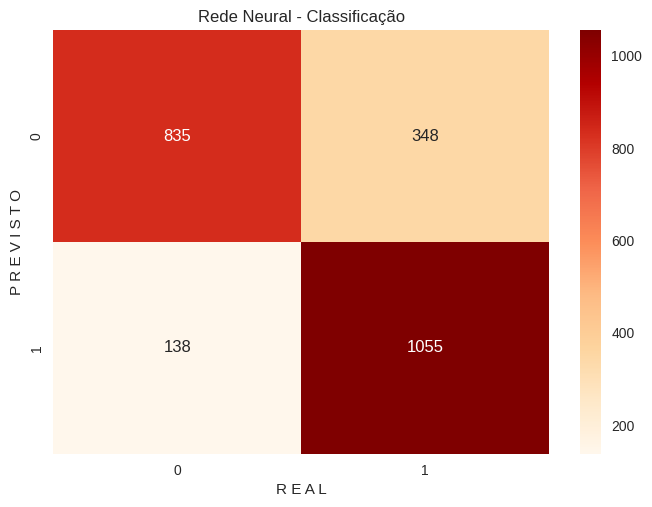

In [ ]:
sns.heatmap(confusion_matrix(y_teste, previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Classificação')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

**Métricas**

In [ ]:
acuracia = accuracy_score(y_teste,previsoes)
precisao = precision_score(y_teste,previsoes)
recall = recall_score(y_teste,previsoes)
f1Score = f1_score(y_teste,previsoes)
curva_roc = roc_auc_score(y_teste,previsoes)
kappa = cohen_kappa_score(y_teste,previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(curva_roc,2)}')

Acurácia:0.8
Precisão:0.75
Recall ou Sensibilidade:0.88
F1-Score:0.81
Kappa:0.59
Curva ROC:0.8


**Curva ROC**

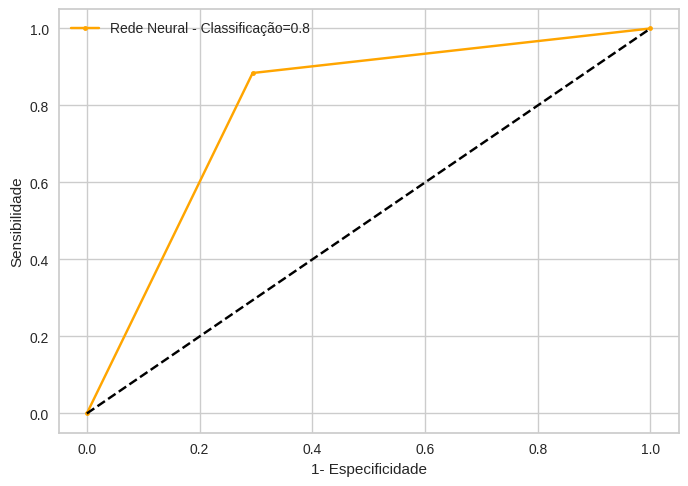

In [ ]:
fp,vp,lim1 = roc_curve(y_teste,previsoes)
plt.plot(fp,vp, marker='.', label='Rede Neural - Classificação='+str(round(curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
plt.legend()
plt.show()

**Cross Validation ou Validação Cruzada**

In [ ]:
#dropout: é uma técnica, para reduzir o super treinamento (overfitting), que controla a
#porcentagem de neurônios desativados aleatoriamente durante o treinamento.
previsores = X
classe = y

def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 8))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    otimizador = tf.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
    classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classificador

In [ ]:
classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 100,
                                batch_size = 10)
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()

<ipython-input-23-061ea446afeb>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classificador = KerasClassifier(build_fn = criarRede,


Epoch 1/100
856/856 [==============================] - 3s 2ms/step - loss: 0.5752 - binary_accuracy: 0.7149
Epoch 2/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5402 - binary_accuracy: 0.7412
Epoch 3/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5290 - binary_accuracy: 0.7506
Epoch 4/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5257 - binary_accuracy: 0.7493
Epoch 5/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5225 - binary_accuracy: 0.7486
Epoch 6/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5152 - binary_accuracy: 0.7538
Epoch 7/100
856/856 [==============================] - 2s 3ms/step - loss: 0.5106 - binary_accuracy: 0.7563
Epoch 8/100
856/856 [==============================] - 3s 3ms/step - loss: 0.5125 - binary_accuracy: 0.7548
Epoch 9/100
856/856 [==============================] - 2s 2ms/step - loss: 0.5122 - binary_accuracy: 0.7511
Epoch 10/100
856/856 [======

In [ ]:
print(media)
print(desvio)

0.609224306823842
0.09501635996211888


**Salvando uma Rede Neural**

In [ ]:
previsores = X
classe = y

classificador = Sequential()
classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 8))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
classificador.fit(previsores, classe, batch_size = 10, epochs = 100)

classificador_json = classificador.to_json()
with open('classificador_breast.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_breast.h5')

Epoch 1/100
951/951 [==============================] - 4s 3ms/step - loss: 0.5945 - binary_accuracy: 0.6894
Epoch 2/100
951/951 [==============================] - 3s 3ms/step - loss: 0.5497 - binary_accuracy: 0.7238
Epoch 3/100
951/951 [==============================] - 3s 3ms/step - loss: 0.5365 - binary_accuracy: 0.7257
Epoch 4/100
951/951 [==============================] - 3s 3ms/step - loss: 0.5293 - binary_accuracy: 0.7305
Epoch 5/100
951/951 [==============================] - 2s 2ms/step - loss: 0.5240 - binary_accuracy: 0.7301
Epoch 6/100
951/951 [==============================] - 2s 2ms/step - loss: 0.5228 - binary_accuracy: 0.7395
Epoch 7/100
951/951 [==============================] - 2s 2ms/step - loss: 0.5163 - binary_accuracy: 0.7447
Epoch 8/100
951/951 [==============================] - 2s 2ms/step - loss: 0.5120 - binary_accuracy: 0.7445
Epoch 9/100
951/951 [==============================] - 2s 2ms/step - loss: 0.5123 - binary_accuracy: 0.7492
Epoch 10/100
951/951 [======

**Carregando e compilando com outra função**

In [ ]:
previsores = X
classe = y
#Usando outros parâmetros
classificador.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
resultado = classificador.evaluate(previsores, classe)
print(resultado)

297/297 [==============================] - 1s 1ms/step - loss: 0.4757 - binary_accuracy: 0.7643
[0.47567853331565857, 0.7642601728439331]


In [ ]:
previsoes = classificador.predict(X_teste)
print(previsoes)

75/75 [==============================] - 0s 1ms/step
[[1.5408221e-04]
 [4.8633775e-01]
 [7.4602419e-01]
 ...
 [5.0024968e-01]
 [2.9588653e-05]
 [7.1459186e-01]]


In [ ]:
previsoes = (previsoes > 0.5)
print(previsoes)

[[False]
 [False]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


**RESULTADO**

Comparando a Rede Neural Densa com o classificador Random Forest utilizado na Atividade 1 o Random Forest se sobressai em todos os quesitos de pontuação entretanto se usar como base o classificador SVM a Rede Neural é melhor, mesmo sendo com pequena diferença, supera em todos os quesitos.